In [1]:
import healpy as hp
import matplotlib.pyplot as plt

import pickle

from qubic.lib.QskySim import get_angular_profile, get_noise_invcov_profile

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [2]:
new = pickle.load(open("/home/laclavere/Thesis/qubic/qubic/scripts/MapMaking/src/CMM/parametric_d0_DB_test_planck/maps/new_planck_acq_seed1_None_k0.pkl", "rb"))
old = pickle.load(open("/home/laclavere/Thesis/qubic/qubic/scripts/MapMaking/src/CMM/parametric_d0_DB_test_planck/maps/old_planck_acq_seed1_None_k0.pkl", "rb"))

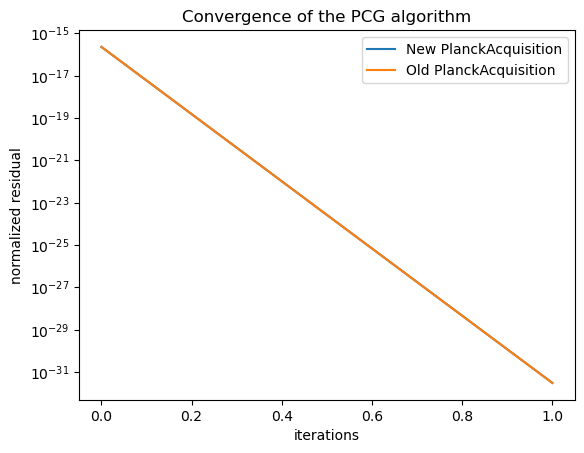

In [3]:
convergence_new = new["convergence"][0]
convergence_old = old["convergence"][0]

plt.plot(convergence_new, label="New PlanckAcquisition")
plt.plot(convergence_old, label="Old PlanckAcquisition")
plt.xlabel('iterations')
plt.ylabel('normalized residual')
plt.title('Convergence of the PCG algorithm')
plt.yscale('log')
plt.legend()
plt.show()

In [4]:
maps_in_new = new['components_in_convolved']
maps_rec_new = new['components_iter']
residuals_new = maps_in_new - maps_rec_new

maps_in_old = old['components_in_convolved']
maps_rec_old = old['components_iter']
residuals_old = maps_in_old - maps_rec_old

New PlanckAcquisition


Text(0.5, 1.0, 'New PlanckAcquisition')

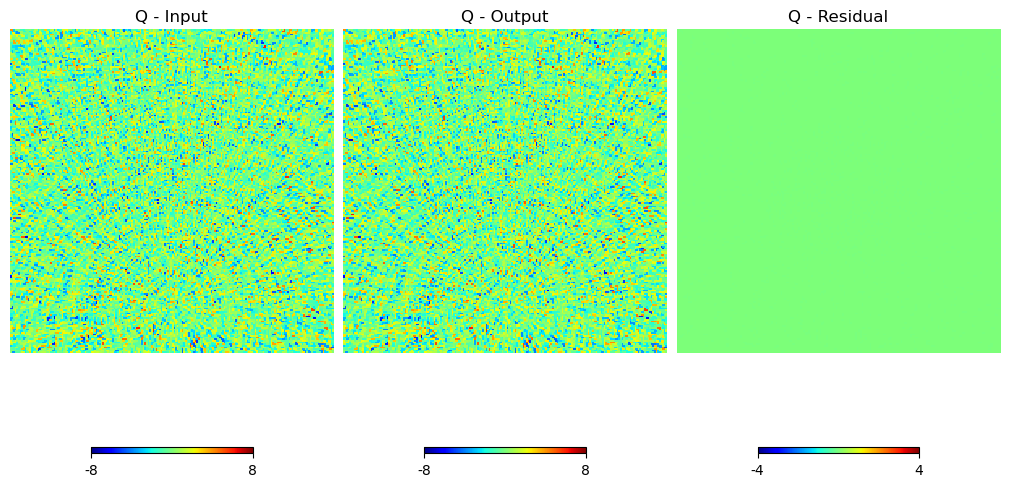

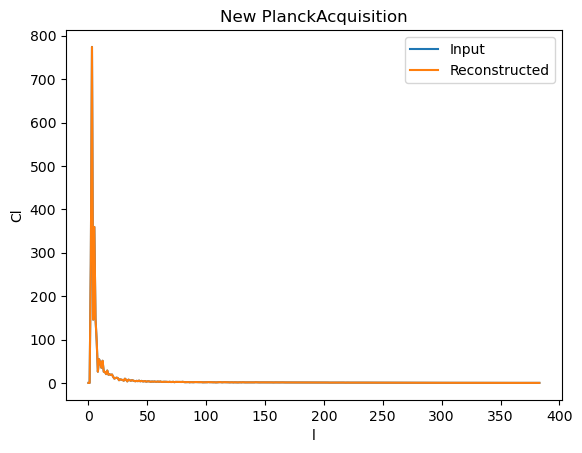

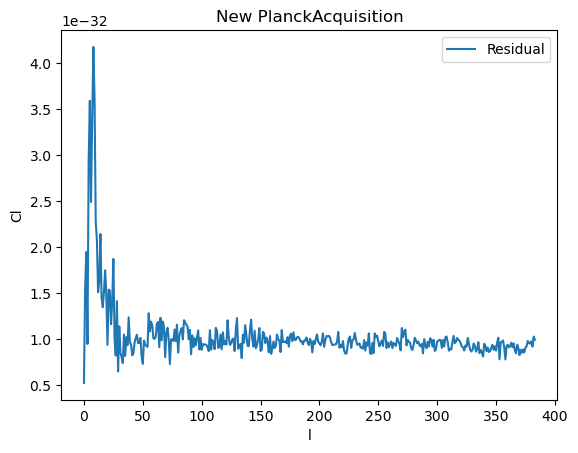

In [7]:
stk = ['I', 'Q', 'U']
icomp = 0
istk = 1
n_sig = 3
reso = 30
min = -8
max = 8

plt.figure(figsize=(10, 12))
print("New PlanckAcquisition")
k=1
hp.gnomview(maps_in_new[icomp, :, istk], cmap='jet', rot=new['center'], min=min, max=max, reso=reso, sub=(1, 3, k), title=f'{stk[istk]} - Input', notext=True)
hp.gnomview(maps_rec_new[icomp, :, istk], cmap='jet', rot=new['center'], min=min, max=max, reso=reso, sub=(1, 3, k+1), title=f'{stk[istk]} - Output', notext=True)
hp.gnomview(residuals_new[icomp, :, istk], cmap='jet', rot=new['center'], min=min/2, max=max/2, reso=reso, sub=(1, 3, k+2), title=f'{stk[istk]} - Residual', notext=True)
k+=3

plt.figure()
plt.plot(hp.anafast(maps_in_new[icomp, :, 0]), label="Input")
plt.plot(hp.anafast(maps_rec_new[icomp, :, 0]), label="Reconstructed")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("New PlanckAcquisition")

plt.figure()
plt.plot(hp.anafast(maps_in_new[icomp, :, 0] - maps_rec_new[icomp, :, 0]), label="Residual")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("New PlanckAcquisition")

Old PlanckAcquisition


Text(0.5, 1.0, 'Old PlanckAcquisition')

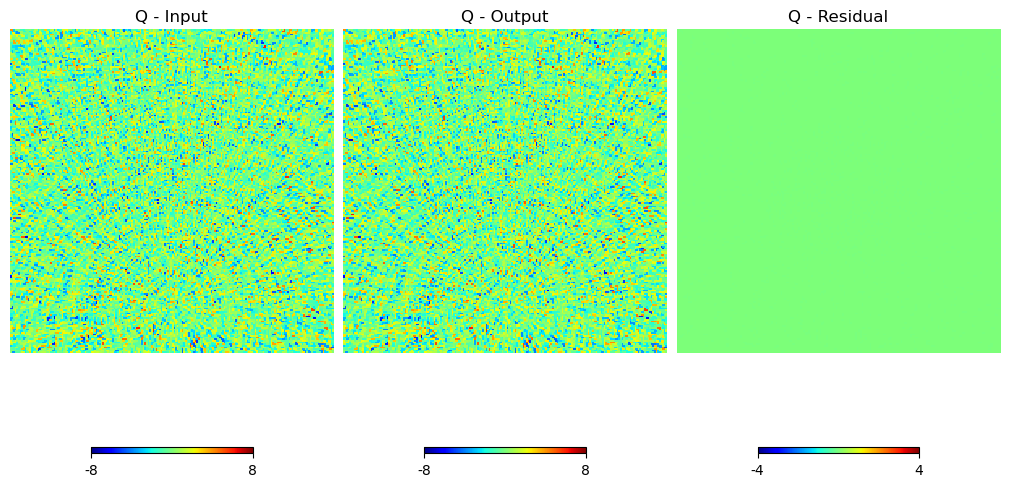

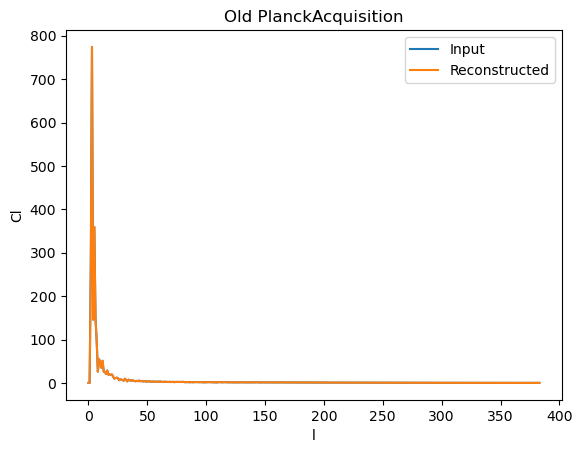

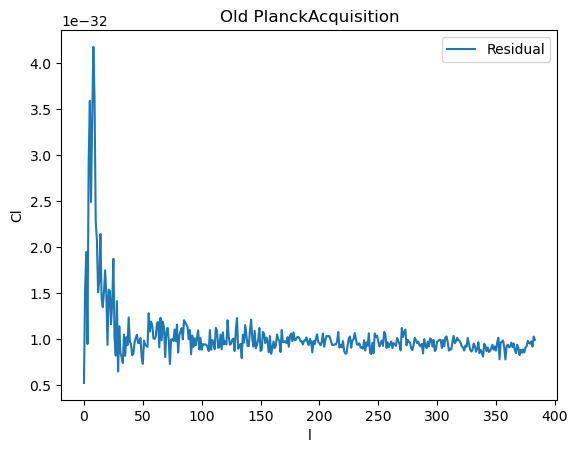

In [8]:
plt.figure(figsize=(10, 12))
print("Old PlanckAcquisition")
k=1
hp.gnomview(maps_in_old[icomp, :, istk], cmap='jet', rot=old['center'], min=min, max=max, reso=reso, sub=(1, 3, k), title=f'{stk[istk]} - Input', notext=True)
hp.gnomview(maps_rec_old[icomp, :, istk], cmap='jet', rot=old['center'], min=min, max=max, reso=reso, sub=(1, 3, k+1), title=f'{stk[istk]} - Output', notext=True)
hp.gnomview(residuals_old[icomp, :, istk], cmap='jet', rot=old['center'], min=min/2, max=max/2, reso=reso, sub=(1, 3, k+2), title=f'{stk[istk]} - Residual', notext=True)
k+=3

plt.figure()
plt.plot(hp.anafast(maps_in_old[icomp, :, 0]), label="Input")
plt.plot(hp.anafast(maps_rec_old[icomp, :, 0]), label="Reconstructed")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("Old PlanckAcquisition")

plt.figure()
plt.plot(hp.anafast(maps_in_old[icomp, :, 0] - maps_rec_old[icomp, :, 0]), label="Residual")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("Old PlanckAcquisition")

(79,) (79,) (79,)
(79,) (79,) (79,)


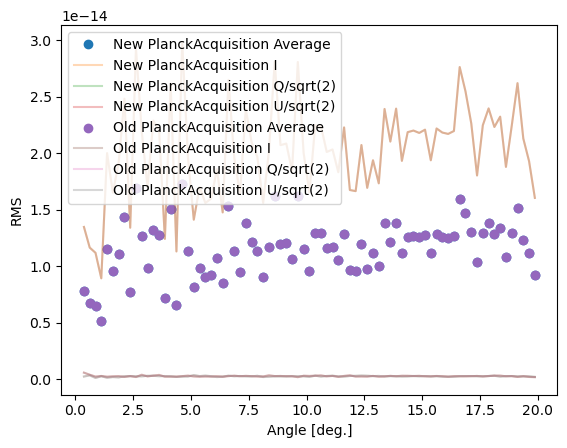

In [9]:
get_angular_profile(residuals_new[0], doplot=True, allstokes=True, nbins=80, thmax=20, label="New PlanckAcquisition")
get_angular_profile(residuals_old[0], doplot=True, allstokes=True, nbins=80, thmax=20, label="Old PlanckAcquisition")
plt.show()

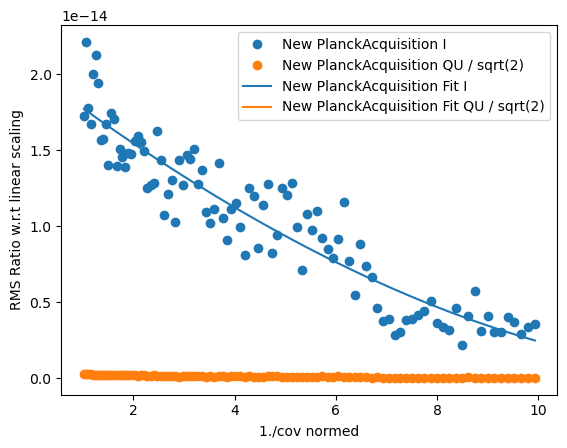

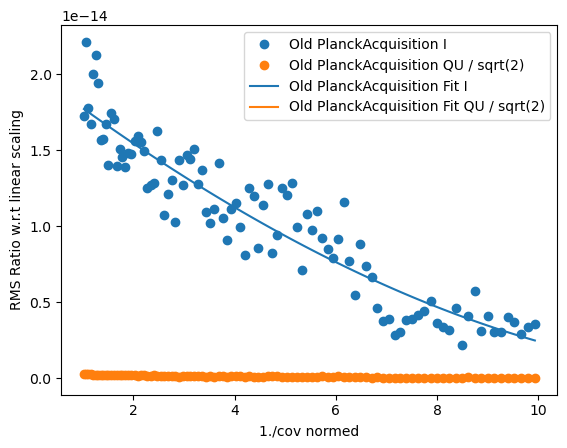

In [10]:
get_noise_invcov_profile(residuals_new[0], new["coverage"], doplot=True, allstokes=True, label="New PlanckAcquisition")
plt.figure()
get_noise_invcov_profile(residuals_old[0], old["coverage"], doplot=True, allstokes=True, label="Old PlanckAcquisition")
plt.show()